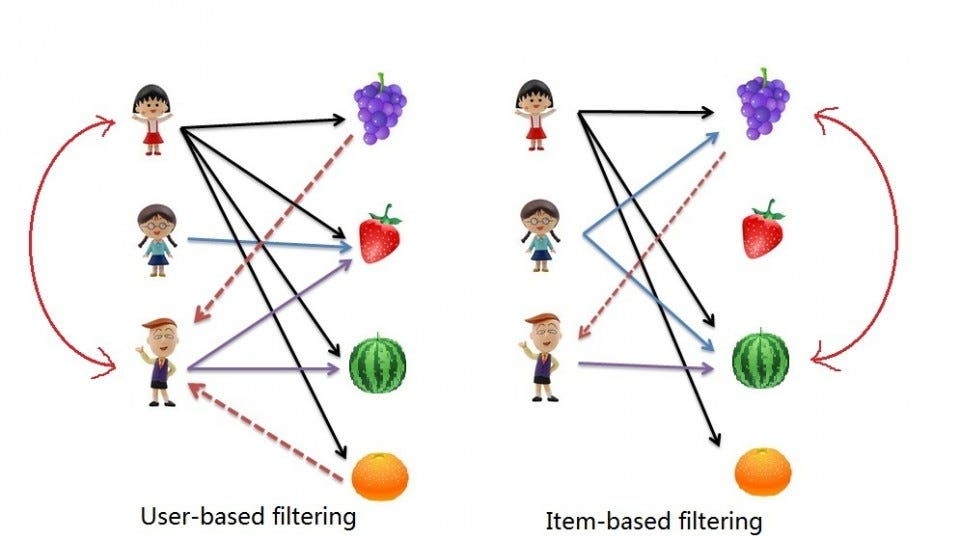

In [10]:
import torch
import torch.nn.functional as F

# Пример данных: матрица взаимодействий пользователей и объектов (оценки от 1 до 5)
# Строки - пользователи, столбцы - объекты
ratings = torch.tensor([
    [5, 3, 0, 1],  # Пользователь 0
    [4, 0, 0, 1],  # Пользователь 1
    [1, 1, 0, 5],  # Пользователь 2
    [1, 0, 0, 4],  # Пользователь 3
    [0, 1, 5, 4],  # Пользователь 4
], dtype=torch.float32)

# Функция для вычисления косинусного сходства
def cosine_similarity(user_ratings, all_ratings):
    # Нормализация оценок
    user_ratings_norm = F.normalize(user_ratings.unsqueeze(0), p=2, dim=1)
    all_ratings_norm = F.normalize(all_ratings, p=2, dim=1)
    # Косинусное сходство
    similarity = torch.mm(user_ratings_norm, all_ratings_norm.T)
    return similarity.squeeze()

# Функция для поиска самого схожего пользователя
def find_most_similar_user(user_id, ratings):
    # Оценки текущего пользователя
    user_ratings = ratings[user_id]
    # Оценки всех пользователей
    all_ratings = ratings
    # Вычисляем схожесть текущего пользователя с остальными
    similarities = cosine_similarity(user_ratings, all_ratings)
    # Исключаем текущего пользователя
    similarities[user_id] = -1  # Исключаем себя
    # Находим самого схожего пользователя
    most_similar_user = torch.argmax(similarities).item()
    return most_similar_user

# Пример использования
user_id = 3  # Ищем схожего пользователя для пользователя 0
most_similar_user = find_most_similar_user(user_id, ratings)
print(f"Самый схожий пользователь для пользователя {user_id}: {most_similar_user}")

Самый схожий пользователь для пользователя 3: 2
